In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
import math
import sys
import wfdb

import torch

## ВАЖНЫЕ ФУНКЦИИ

In [3]:
def validate_group(func):
    def wrapper(itr, n=3):
        if not isinstance(itr, (list, np.ndarray)):
            raise ValueError(f"Error in {func.__name__}() function: Input 'itr' must be a list or np.ndarray")
        if not isinstance(n, int) or n <= 0:
            raise ValueError("Input 'n' must be a positive integer")

        return func(itr, n)
    return wrapper


@validate_group
def group(itr, n=3):
    itr = iter(itr)
    end = object()
    while True:
        vals = tuple(next(itr, end) for _ in range(n))
        if vals[-1] is end:
            return
        yield vals

In [4]:
SEGMENTS_COLORS = {
    'p': 'red',
    'N': 'blue',
    't': 'green',
}
Fs = 500

In [5]:
def ecg_plot(signals, span=[0, 1], duration=5000, seg=None):
    for i in range(span[0], span[1]):
        try:
            plt.figure(figsize=(20, 2))
            plt.style.use('default')
            plt.gca().set_facecolor('#ffd5ce')
            plt.gca().spines[:].set_color('salmon')
            plt.gca().spines[:].set_linewidth(2)
            plt.gcf().set_facecolor('linen')
            plt.gca().tick_params(color='salmon', width=2)
            plt.grid(color='salmon', linestyle='-', linewidth=2, zorder=1)

            ECG = signals[i] if len(signals.shape) > 1 else signals
            ECG = ECG[(5000-duration)/2 : (5000+duration)/2 + 1]
            TIME = np.arange(0, ECG.shape[0], 1)
            plt.plot(TIME, ECG, color='black', zorder=3)

            if seg:
                for start, symbol, end in group(seg[i].sample, 3):
                    k = np.nonzero(seg[i].sample == symbol)[0][0]
                    color = SEGMENTS_COLORS[seg[i].symbol[k]]
                    plt.axvspan(start, end, color=color, alpha=0.3, zorder=2)

        except IndexError:
            print('эээээ куда')

In [6]:
def ecg_fft_plot(signals, span=[0, 1], spectrum_type='f'):
    for i in range(span[0], span[1]):
        try:
            fig, axes = plt.subplots(1, 2, figsize=(20, 2), gridspec_kw={'width_ratios': [2, 1]})
            plt.style.use('default')
            plt.gcf().set_facecolor('linen')

            axes[0].set_facecolor('#ffd5ce')
            axes[0].spines[:].set_color('salmon')
            axes[0].spines[:].set_linewidth(2)
            axes[0].tick_params(color='salmon', width=2)
            axes[0].grid(color='salmon', linestyle='-', linewidth=2)

            ECG = signals[i] if len(signals.shape) > 1 else signals
            TIME = np.arange(0, ECG.shape[0], 1) / Fs
            axes[0].plot(TIME, ECG, color='black')
    

            if spectrum_type == 'f':
                axes[1].set_facecolor('#ffd5ce')
                axes[1].spines[:].set_color('salmon')
                axes[1].spines[:].set_linewidth(2)
                axes[1].tick_params(color='salmon', width=2)
                axes[1].grid(color='salmon', linestyle='-', linewidth=2)

                fft_result = np.fft.fft(ECG)
                freqs = np.fft.fftfreq(len(ECG), 1/Fs)
                axes[1].plot(np.abs(freqs), np.abs(fft_result), color='black')
                # axes[1].set_xlim(-0.001, 0.03)
            

            elif spectrum_type == 'spec':
                spec = axes[1].specgram(ECG, Fs=Fs, scale='dB', cmap='jet')
                axes[1].set_xlabel('Время (с)')
                axes[1].set_ylabel('Частота (Гц)')
                axes[1].set_title('Спектограмма ЭКГ сигнала')
                plt.colorbar(spec[3], ax=axes[1], label='Амплитуда')


        except IndexError:
            print('эээээ куда')

## draft

In [7]:
df = pd.read_csv("mitbih_train.csv", header=None).to_numpy()
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'mitbih_train.csv'

In [ ]:
Fs = 500

In [ ]:
ECG = df[1, :]
TIME = np.arange(0, ECG.shape[0], 1)

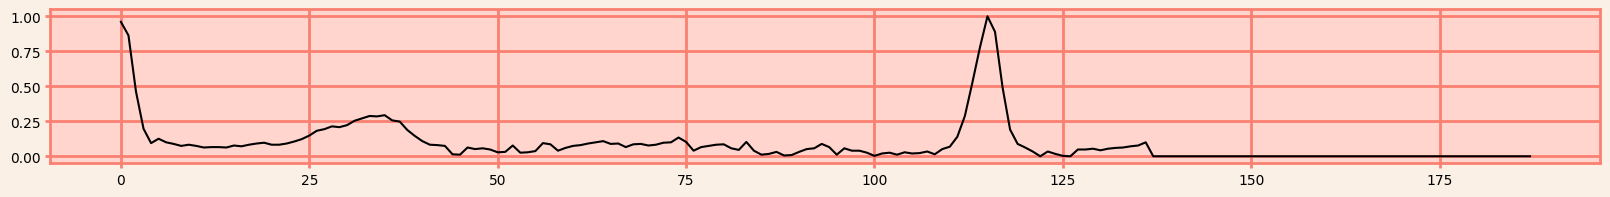

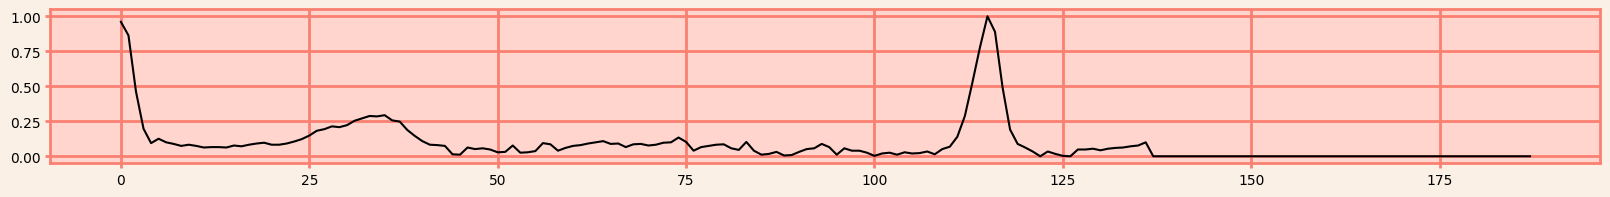

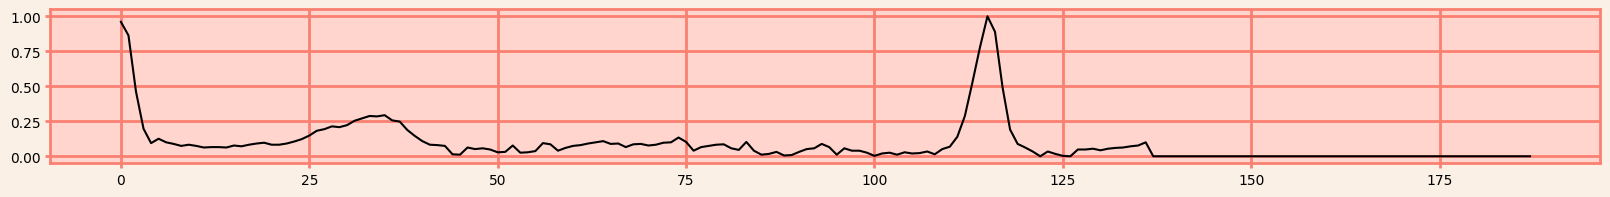

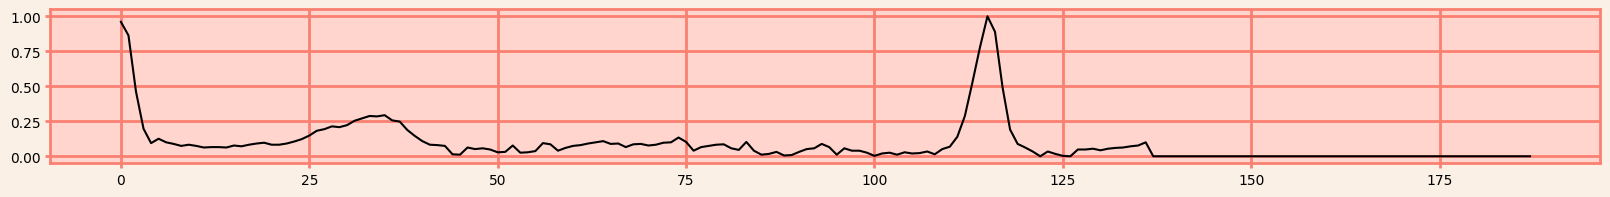

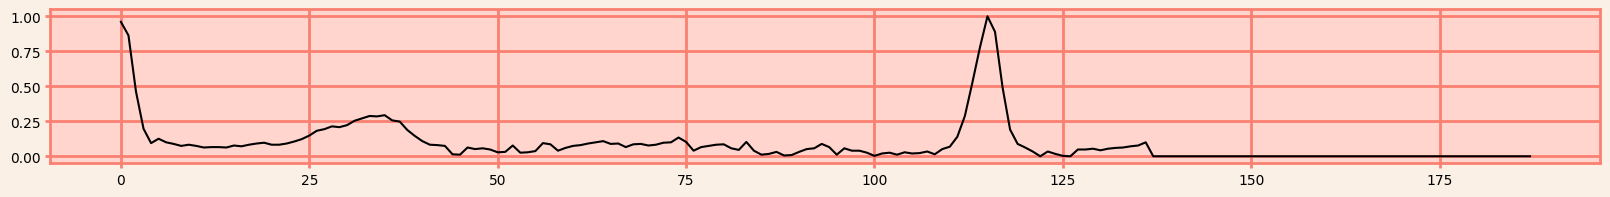

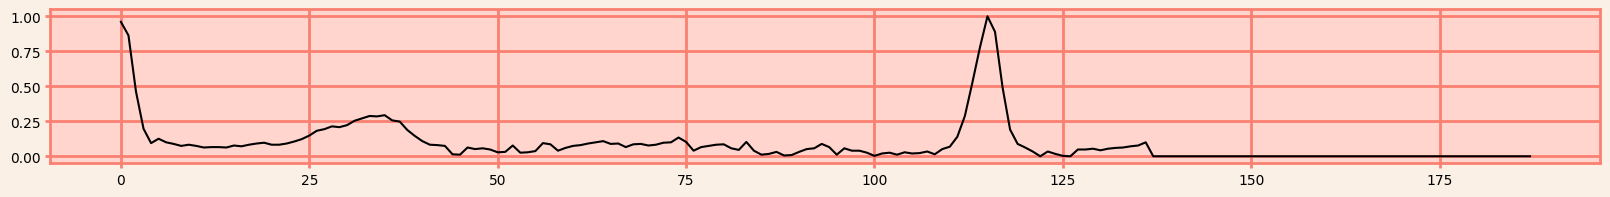

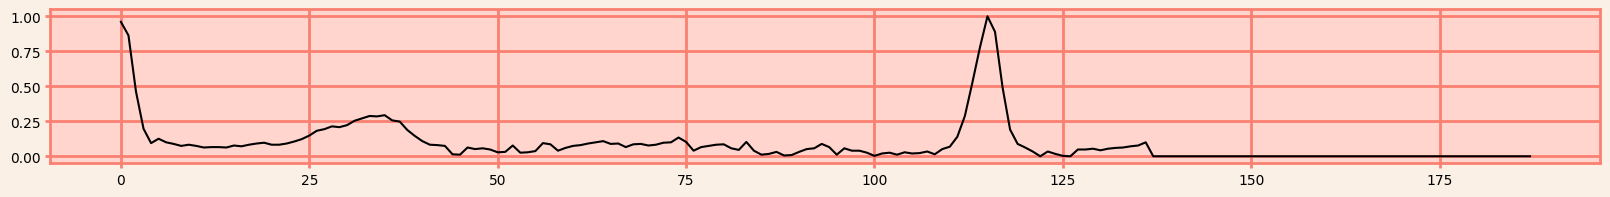

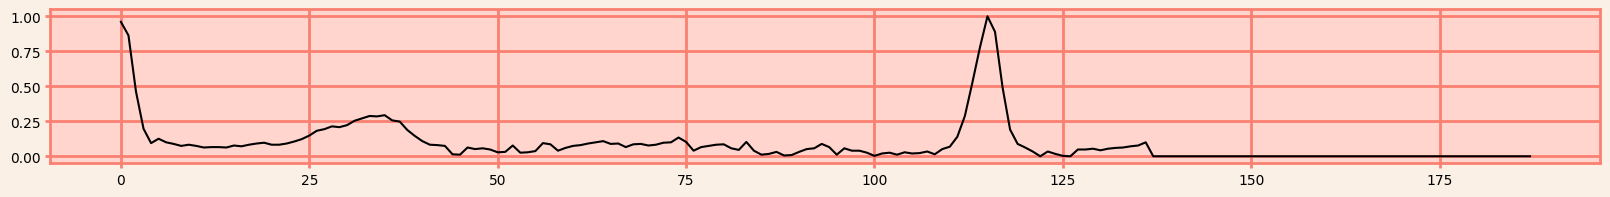

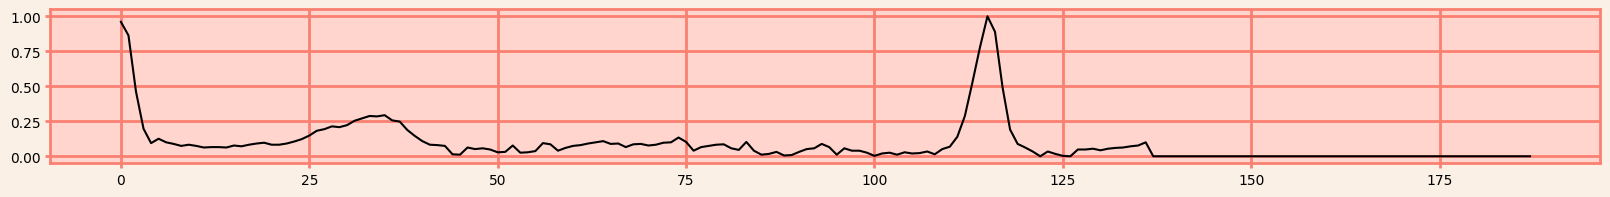

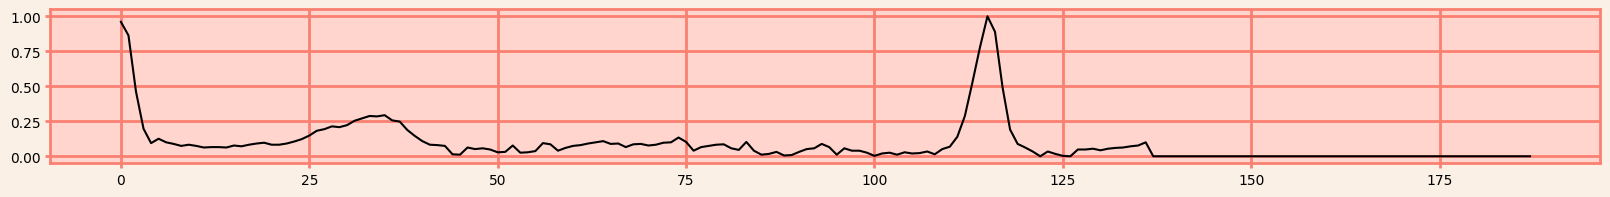

In [ ]:
for i in range(10):
    plt.figure(figsize=(20, 2))
    plt.style.use('default')
    plt.gca().set_facecolor('#ffd5ce')
    plt.gca().spines[:].set_color('salmon')
    plt.gca().spines[:].set_linewidth(2)
    plt.gcf().set_facecolor('linen')
    plt.gca().tick_params(color='salmon', width=2)
    plt.grid(color='salmon', linestyle='-', linewidth=2)

    EСG = df[i, :]
    TIME = np.arange(0, ECG.shape[0], 1)
    plt.plot(TIME, ECG, color='black')

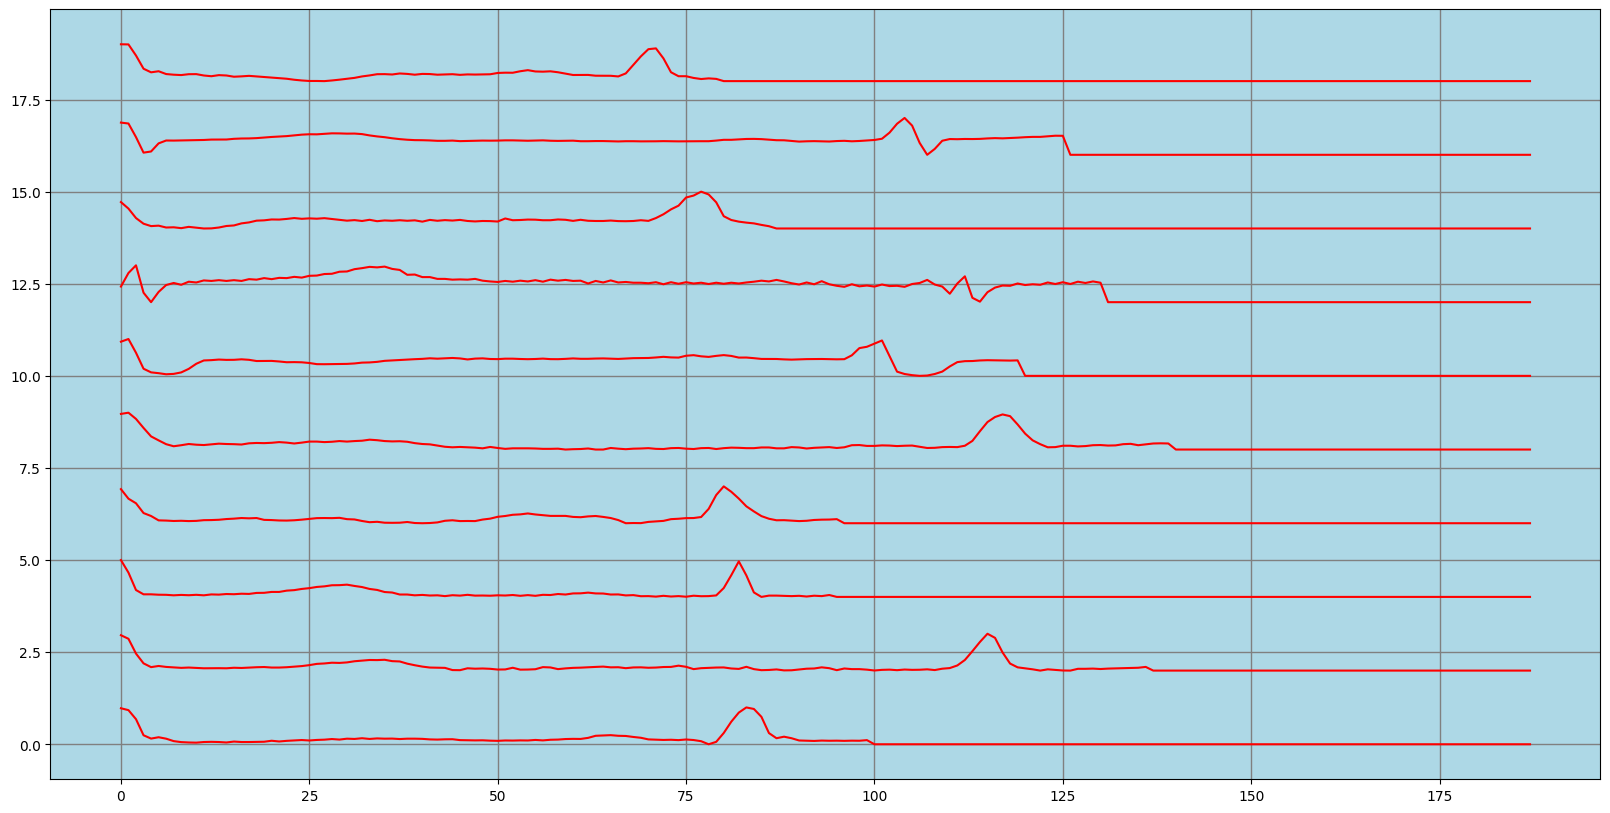

In [ ]:
plt.figure(figsize=(20, 10))
plt.gca().set_facecolor('lightblue')
plt.grid(color='gray', linestyle='-', linewidth=1)

for i in range(10):
    ECG = df[i, :] + i*2
    TIME = np.arange(0, ECG.shape[0], 1)
    plt.plot(TIME, ECG, color='red')

In [ ]:
data = loadmat('JS00001.mat')
variable = data['val']

FileNotFoundError: [Errno 2] No such file or directory: 'JS00001.mat'

In [ ]:
ecg_fft_plot(variable, [0, 11], spectrum_type='spec')

NameError: name 'variable' is not defined

In [ ]:
def NLM_1dDarbon(signal,Nvar,P,PatchHW):
    if isinstance(P,int): # scalar has been entered; expand into patch sample index vector
        P = P-1 #Python start index from 0
        Pvec = np.array(range(-P,P+1))
    else:
        Pvec = P # use the vector that has been input
    signal = np.array(signal)
    #debug = [];
    N = len(signal)

    denoisedSig = np.empty(len(signal)) #NaN * ones(size(signal));
    denoisedSig[:] = np.nan
    # to simpify, don't bother denoising edges
    iStart = PatchHW+1
    iEnd = N - PatchHW
    denoisedSig[iStart: iEnd] = 0

    #debug.iStart = iStart;
    #debug.iEnd = iEnd;

    # initialize weight normalization
    Z = np.zeros(len(signal))
    cnt = np.zeros(len(signal))

    # convert lambda value to  'h', denominator, as in original Buades papers
    Npatch = 2 * PatchHW + 1
    h = 2 * Npatch * Nvar**2

    for idx in Pvec: # loop over all possible differences: s - t
        # do summation over p - Eq.3 in Darbon
        k = np.array(range(N))
        kplus = k + idx
        igood = np.where((kplus >=0) & (kplus < N)) # ignore OOB data; we could also handle it
        SSD = np.zeros(len(k))
        SSD[igood] = (signal[k[igood]] - signal[kplus[igood]])**2
        Sdx = np.cumsum(SSD)

        for ii in range(iStart,iEnd): # loop over all points 's'
            distance = Sdx[ii + PatchHW] - Sdx[ii - PatchHW-1] #Eq 4;this is in place of point - by - point MSE
            # but note the - 1; we want to icnlude the point ii - iPatchHW

            w = math.exp(-distance/h) # Eq 2 in Darbon
            t = ii + idx # in the papers, this is not made explicit

            if t>0 and t<N:
                denoisedSig[ii] = denoisedSig[ii] + w * signal[t]
                Z[ii] = Z[ii] + w
                #cnt[ii] = cnt[ii] + 1
                #print('ii',ii)
                #print('t',t)
                #print('w',w)
                #print('denoisedSig[ii]', denoisedSig[ii])
                #print('Z[ii]',Z[ii])
     # loop over shifts

    # now apply normalization
    denoisedSig = denoisedSig/(Z + sys.float_info.epsilon)
    denoisedSig[0: PatchHW+1] = signal[0: PatchHW+1]
    denoisedSig[ - PatchHW: ] = signal[- PatchHW: ]
    #debug.Z = Z;

    return denoisedSig#,debug

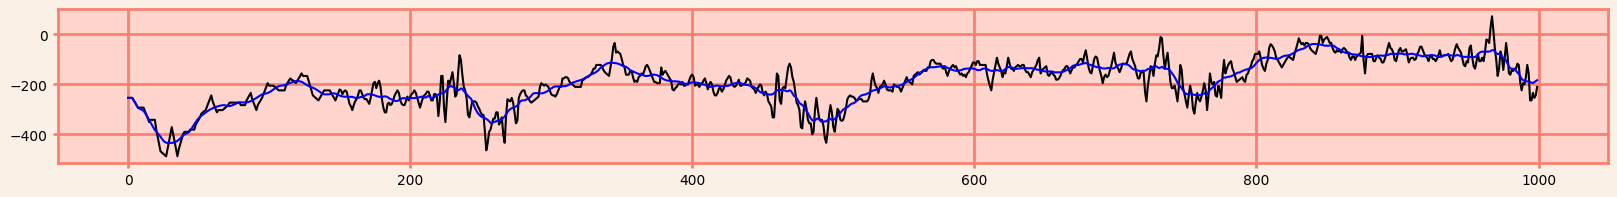

In [ ]:
for i in range(1):
    plt.figure(figsize=(20, 2))
    plt.style.use('default')
    plt.gca().set_facecolor('#ffd5ce')
    plt.gca().spines[:].set_color('salmon')
    plt.gca().spines[:].set_linewidth(2)
    plt.gcf().set_facecolor('linen')
    plt.gca().tick_params(color='salmon', width=2)
    plt.grid(color='salmon', linestyle='-', linewidth=2)

    EСG = variable[i, :1000]
    TIME = np.arange(0, EСG.shape[0], 1)
    plt.plot(TIME, EСG, color='black')

    EСG = NLM_1dDarbon(variable[i], 100, 11, 7)[:1000]
    plt.plot(TIME, EСG, color='blue')

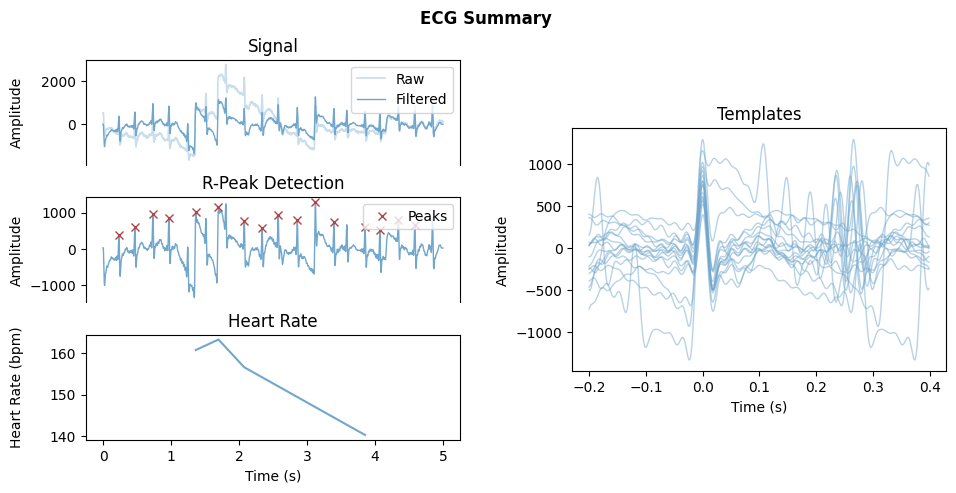

In [ ]:
out = ecg.ecg(signal=variable[11], sampling_rate=1000., show=True)

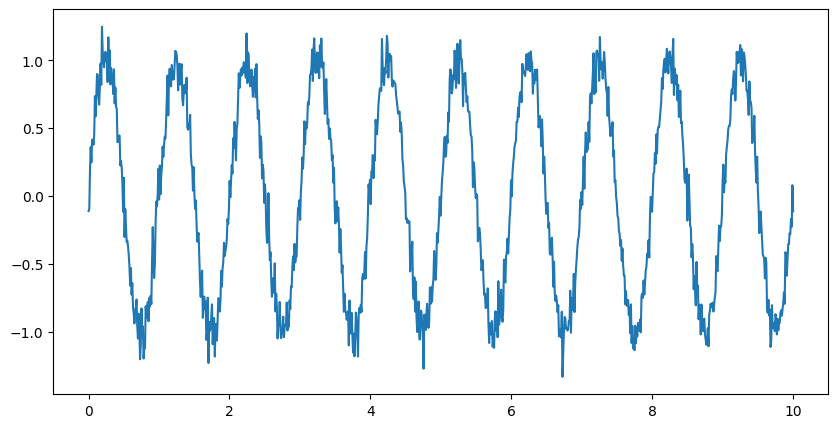

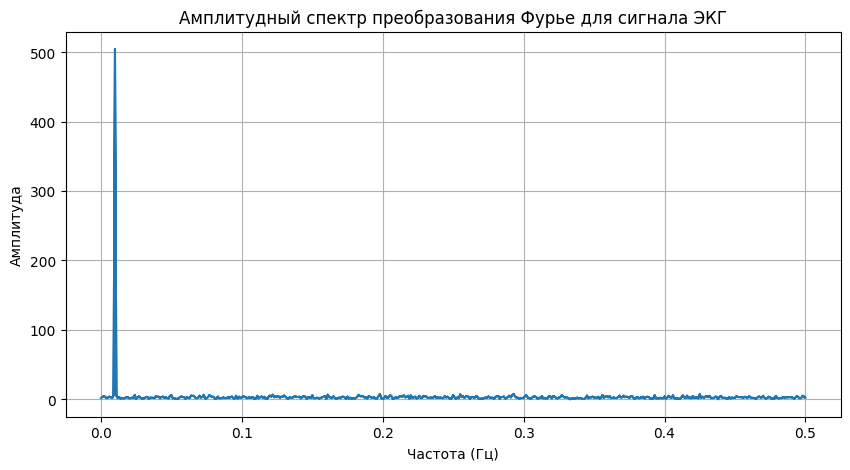

In [ ]:
t = np.linspace(0, 10, 1000)  # Время от 0 до 10 секунд
heart_rate = 60  # Установим частоту сердечных сокращений в 60 ударов в минуту
ecg_signal = np.sin(2 * np.pi * heart_rate / 60 * t) + 0.1 * np.random.randn(1000)

fft_result = np.fft.fft(ecg_signal)
freqs = np.fft.fftfreq(len(ecg_signal))

plt.figure(figsize=(10, 5))
plt.plot(t, ecg_signal)


plt.figure(figsize=(10, 5))
plt.plot(np.abs(freqs), np.abs(fft_result))
plt.title('Амплитудный спектр преобразования Фурье для сигнала ЭКГ')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

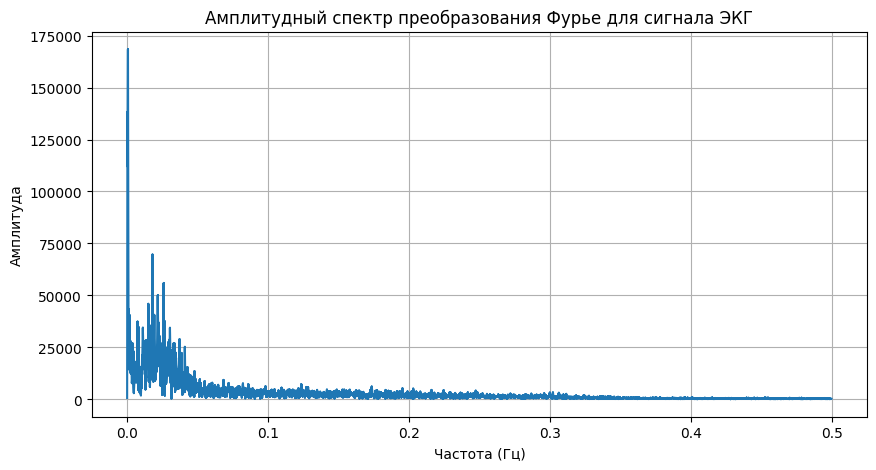

In [ ]:
ECG = variable[1]
fft_result = np.fft.fft(ECG)
freqs = np.fft.fftfreq(len(ECG))

plt.figure(figsize=(10, 5))
plt.plot(np.abs(freqs), np.abs(fft_result))
plt.title('Амплитудный спектр преобразования Фурье для сигнала ЭКГ')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

(array([-0.00769823, -0.04080062, -0.02925327, ...,  0.01308699,
       -0.02155504, -0.00384911]), array([['680', '('],
       ['712', 'N'],
       ['729', ')'],
       ['811', '('],
       ['853', 't'],
       ['883', ')'],
       ['1063', '('],
       ['1087', 'p'],
       ['1103', ')'],
       ['1167', '('],
       ['1198', 'N'],
       ['1212', ')'],
       ['1295', '('],
       ['1340', 't'],
       ['1372', ')'],
       ['1543', '('],
       ['1573', 'p'],
       ['1593', ')'],
       ['1630', '('],
       ['1647', 'N'],
       ['1693', ')'],
       ['1773', '('],
       ['1823', 't'],
       ['1854', ')'],
       ['2029', '('],
       ['2054', 'p'],
       ['2080', ')'],
       ['2114', '('],
       ['2130', 'N'],
       ['2177', ')'],
       ['2258', '('],
       ['2302', 't'],
       ['2336', ')'],
       ['2520', '('],
       ['2546', 'p'],
       ['2565', ')'],
       ['2609', '('],
       ['2626', 'N'],
       ['2668', ')'],
       ['2749', '('],
       ['2796', 't'],
    

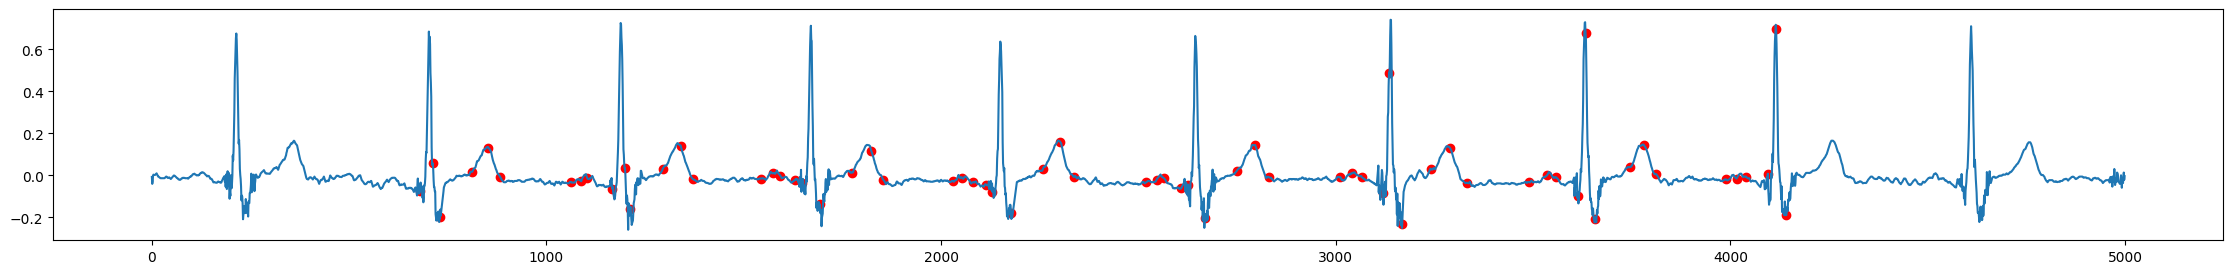

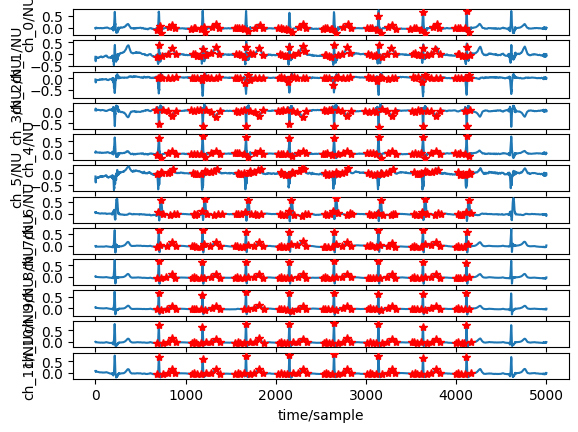

In [ ]:
from typing import Union,List, Tuple
DATA_FOLDER = R"C:\Users\George.LAPTOP-TLP259VH\Desktop\Project2\lobachevsky-university-electrocardiography-database-1.0.1\data"
LEADS = ['avf', 'avl', 'avr', 'i', 'ii', 'iii', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
# get signal with wfdb library
# using an index
def get_signal(index:int, as_p_signal:bool=True) -> Union[wfdb.Record, np.ndarray]:
    record = wfdb.rdrecord(DATA_FOLDER + "/" +  str(index))
    assert type(record) is wfdb.Record

    if as_p_signal:
        assert type(record.p_signal) is np.ndarray
        return record.p_signal
        
    return record

# get annotations given the ecg lead
def get_annotations(index:int, lead, as_sample=True) -> Union[wfdb.Annotation, np.ndarray]:
    annotations = wfdb.rdann(DATA_FOLDER +"/" + str(index), extension = lead)
    if as_sample:
        return np.array(annotations.sample)
    return annotations

# get a full EGC with 12 leads
def get_full_ecg(index:int):
    signal = get_signal(index)
    annotations = [
        get_annotations(index, lead) for lead in LEADS
    ]
    return signal, annotations


def get_single_lead_ecg(index, lead) -> Tuple[np.ndarray, np.ndarray]:
    """
    return and ecg signal and its annotations
    both as ndarray
    """
    signal = get_signal(index)
    assert type(signal) is np.ndarray
    signal = signal[:, LEADS.index(lead)]

    samples = get_annotations(index, lead)
    assert type(samples) is np.ndarray
    
    return signal, samples

def get_annotations_symbols(index, lead):
    ann = get_annotations(index, lead, as_sample=False)
    return ann.symbol

def paired_annotation_sample_and_symbol(index, lead):
    annotations_symbols = get_annotations_symbols(index, lead)
    annotations_sample = get_annotations(index, lead)
    return zip(annotations_sample, annotations_symbols)


def get_single_lead_ecg_with_symbols(index, lead):
    """
    return and ecg signal and its annotations
    both as ndarray
    """
    signal = get_signal(index)
    assert type(signal) is np.ndarray
    signal = signal[:, LEADS.index(lead)]

    data = paired_annotation_sample_and_symbol(index, lead)
    
    return signal, np.array(list(data))

# plot single lead ecg with annotations
def plot_single_lead_ecg(index, lead):
    signal, samples = get_single_lead_ecg(index, lead)

    fig, ax = plt.subplots(figsize = (28, 3))

    ax.plot(signal)
    ax.scatter(samples, signal[samples], c = 'r', marker = 'o')


# now plot every lead with annotations
def plot_signal_with_annotation(index):
    signal, samples = get_full_ecg(index)
    # extract sample from annotations
    wfdb.plot_items(signal, samples)


print(get_single_lead_ecg_with_symbols(10, 'avf'))
plot_single_lead_ecg(10, 'avf')
plot_signal_with_annotation(10)

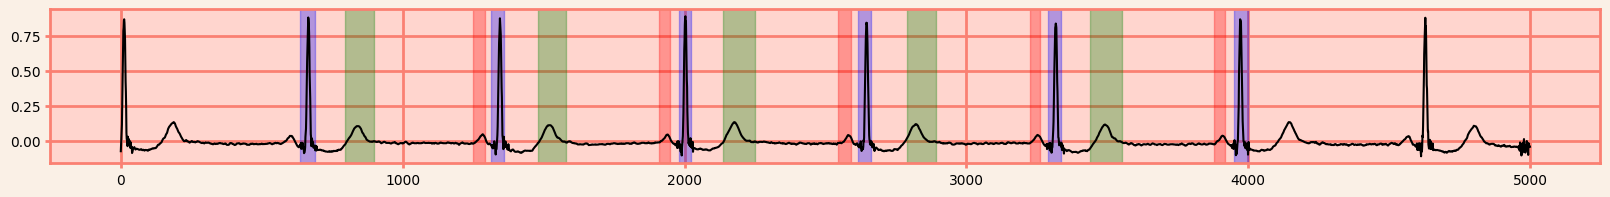

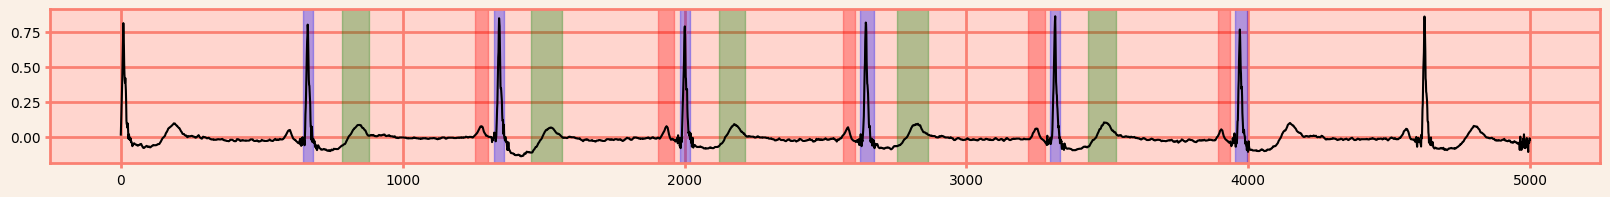

In [29]:
path = R"C:\Users\George.LAPTOP-TLP259VH\Desktop\Project2\lobachevsky-university-electrocardiography-database-1.0.1\data\1"

signals = wfdb.rdrecord(path).p_signal.T

# ecg_fft_plot(signals, [0, 2], spectrum_type='spec')

an = [wfdb.rdann(path, extension='avf'), wfdb.rdann(path, extension='avl')]

ecg_plot(signals, [0, 2], an)


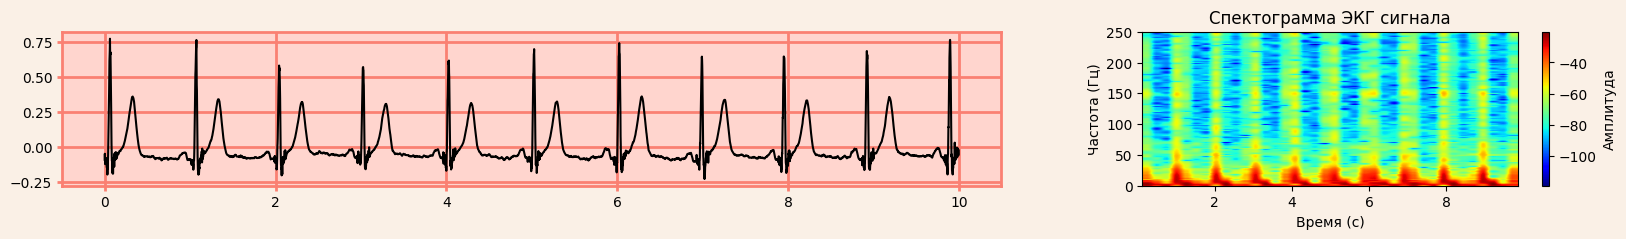

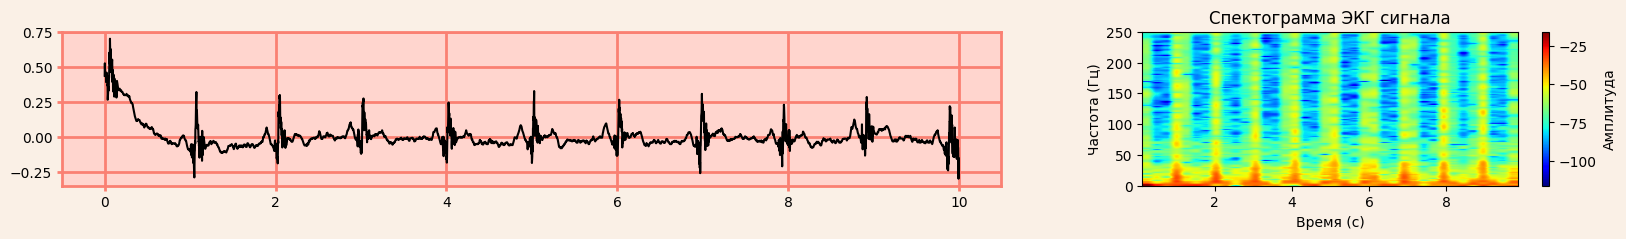

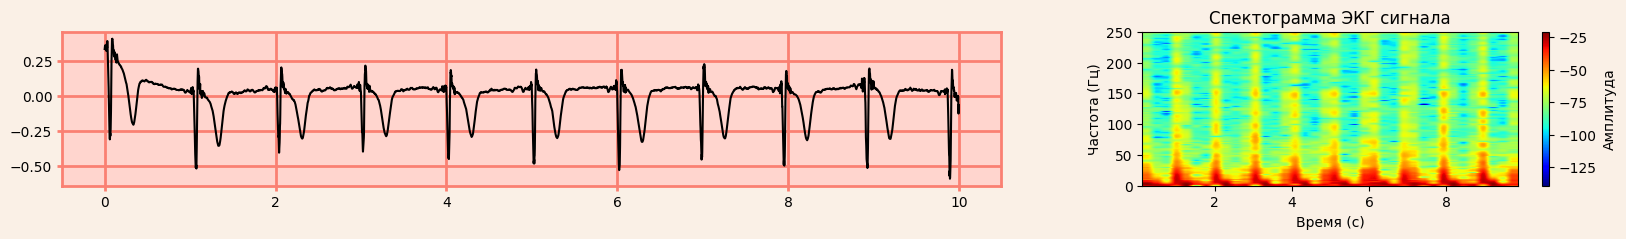

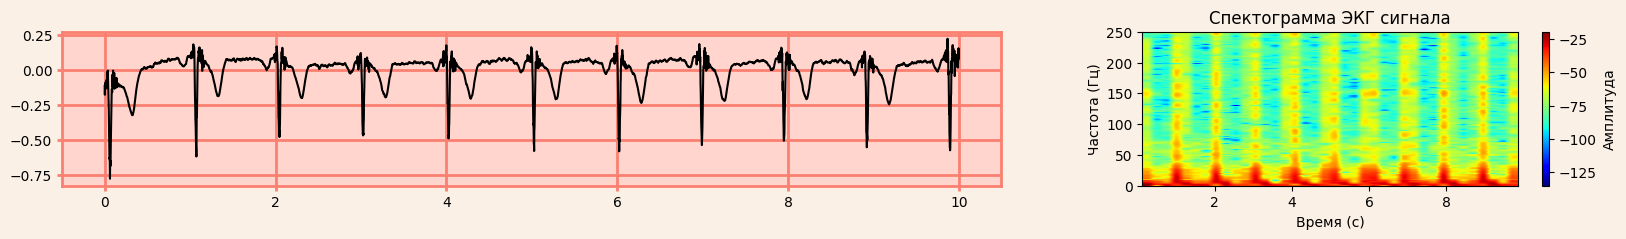

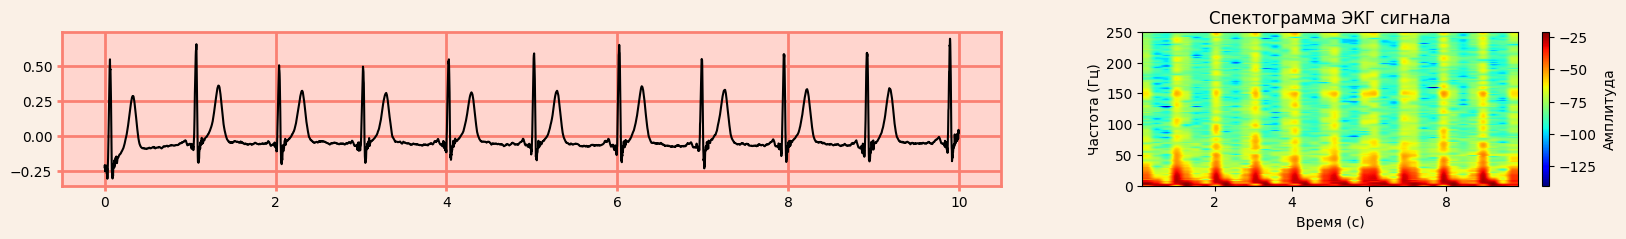

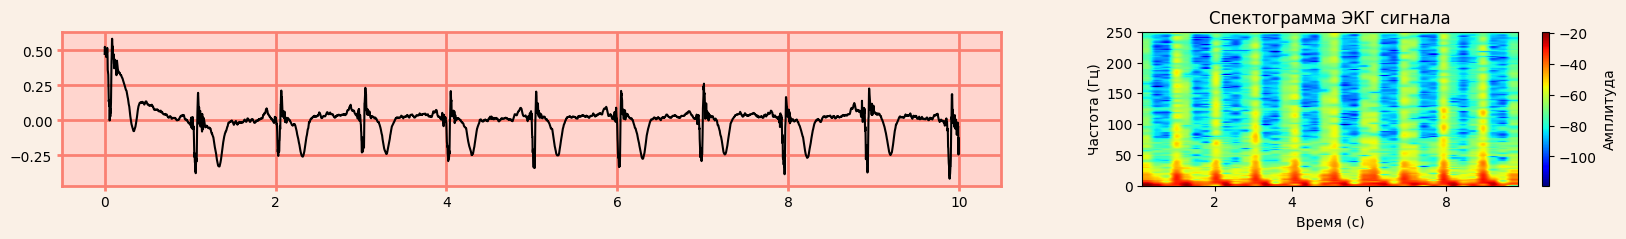

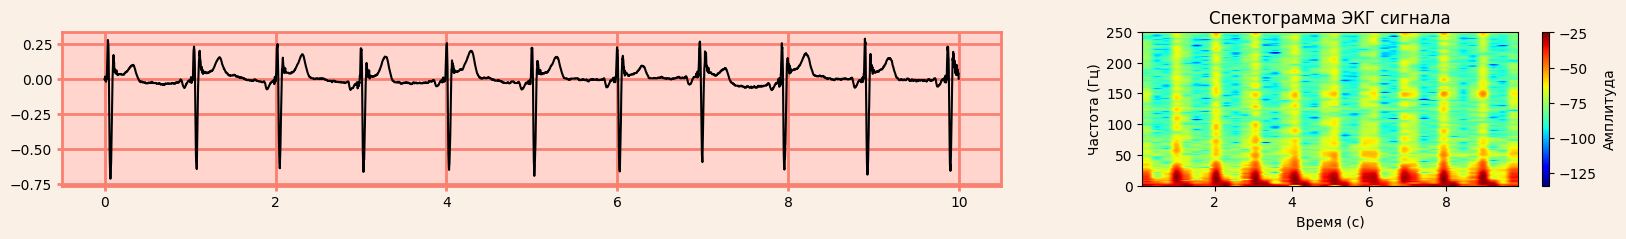

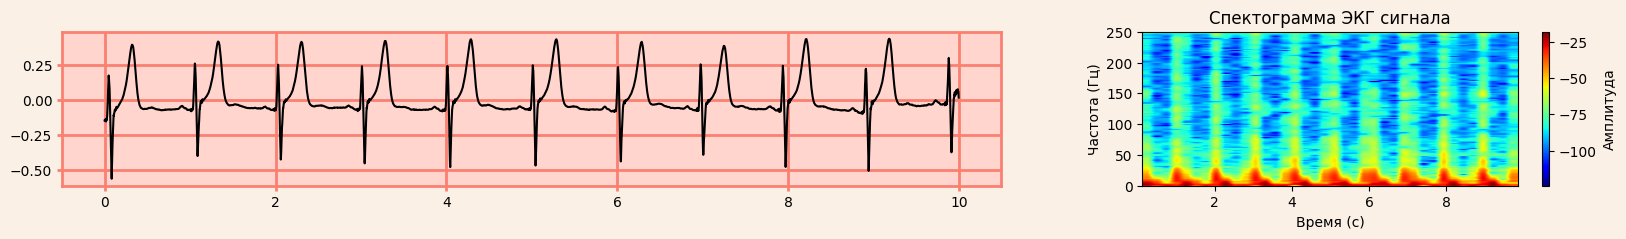

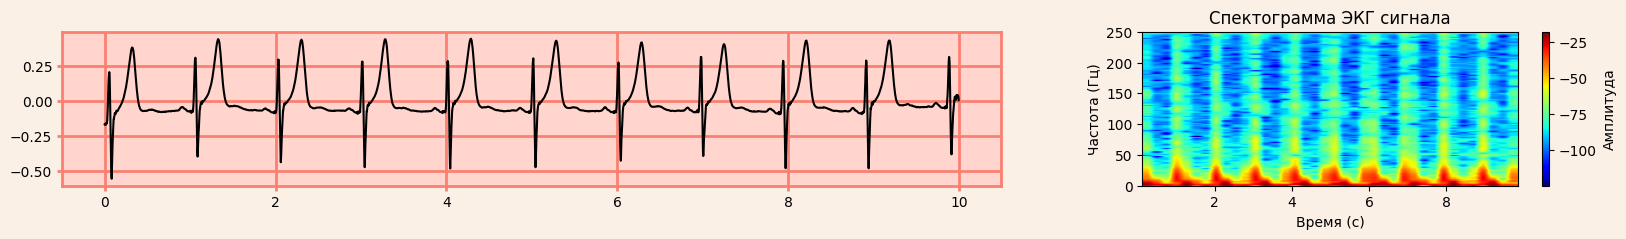

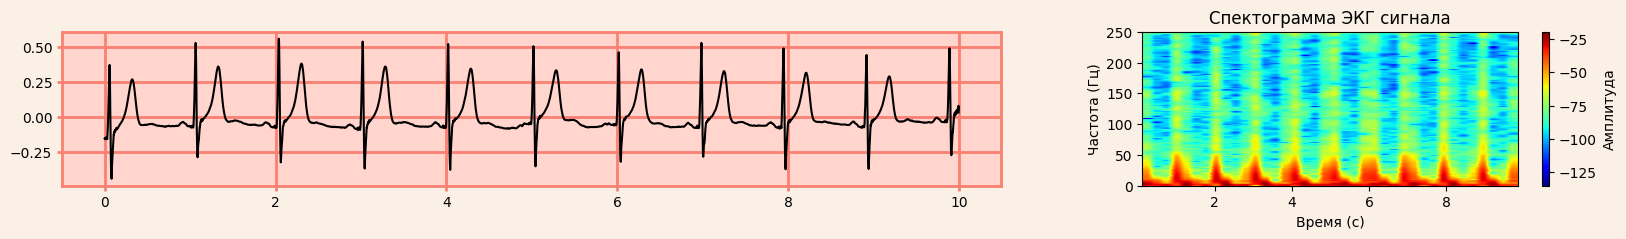

In [ ]:
ecg_fft_plot(signals, [0, 10], spectrum_type='spec')

In [ ]:
class EcgDataset(Dataset):

    def __init__(self, dir, X, Y):
        self.dir = dir
        self.files = os.listdir(dir)[:len(X)]
        self.t = 5000
        self.X = X
        self.Y = Y


    def __len__(self):
        return len(self.X)
    

    def __getitem__(self, index):
        x = self.X[index]
        y = self.Y[index]
        signal = wfdb.rdrecord(self.dir+f"\{x + 1}").p_signal.T[y]

        annotation = wfdb.rdann(self.dir+f"\{x + 1}", extension=LEADS[y])
        segmentation = np.full(self.t, -1)
        
        for start, peak, stop in group(annotation.sample):
            k = np.nonzero(annotation.sample == peak)[0][0]
            segmentation[start:stop] = CATEGORIES[annotation.symbol[k]]

        return torch.tensor(signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0),\
               torch.tensor(np.eye(4, dtype='uint8')[segmentation + 1], dtype=torch.float32).unsqueeze(0).permute(0, 2, 1)

NameError: name 'Dataset' is not defined

In [39]:
print(1)

1


In [40]:
raise ValueError

ValueError: 

In [ ]:
class ConvBlock(nn.Module):
    def __init__(self, inp, out):
        super(ConvBlock, self).__init__()

        self.conv1 = nn.Conv1d(inp, out, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(out, out, kernel_size=3, stride=1, padding=1)

        self.batch1 = nn.BatchNorm1d(out)
        self.batch2 = nn.BatchNorm1d(out)

        self.relu = nn.ReLU()

    def forward(self, inputs):
        x = self.conv1(inputs)
        x = self.batch1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.batch2(x)
        x = self.relu(x)

        return x


class DownsampleBlock(nn.Module):
    def __init__(self, inp, out):
        super(DownsampleBlock, self).__init__()

        self.double_conv = ConvBlock(inp, out)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)   # Убрать?
        self.drop = nn.Dropout(0.05)

    def forward(self, inputs):
        skip = self.double_conv(inputs)
        x = self.pool(skip)
        x = self.drop(x)

        return x, skip


class UpsampleBlock(nn.Module):
    def __init__(self, inp, out):
        super(UpsampleBlock, self).__init__()

        self.up = nn.ConvTranspose1d(inp, out, kernel_size=2, stride=2)
        self.double_conv = ConvBlock(inp, out)
        self.drop = nn.Dropout(0.05)

    def forward(self, inputs, skip):
        x = self.up(inputs)
        x = torch.cat([skip, x], dim=1)
        x = self.drop(x)
        x = self.double_conv(x)

        return x


class UNet(nn.Module):
    def __init__(self, inp=1, out=4):   # dim = [64, ...] -> for
        super(UNet, self).__init__()

        # Encoder
        self.d1 = DownsampleBlock(inp, 64)
        self.d2 = DownsampleBlock(64, 128)
        self.d3 = DownsampleBlock(128, 256)
        self.d4 = DownsampleBlock(256, 512)

        # Bottlneck
        self.b = ConvBlock(512, 1024)

        # Decoder
        self.u1 = UpsampleBlock(1024, 512)
        self.u2 = UpsampleBlock(512, 256)
        self.u3 = UpsampleBlock(256, 128)
        self.u4 = UpsampleBlock(128, 64)

        # Final Convolution
        self.conv_last = nn.Conv1d(64, out, kernel_size=1, padding=0)
        self.sigmoid = nn.Sigmoid()


    def forward(self, inputs):

        x, s1 = self.d1(inputs)
        x, s2 = self.d2(x)
        x, s3 = self.d3(x)
        x, s4 = self.d4(x)

        x = self.b(x)

        x = self.u1(x, s4)
        x = self.u2(x, s3)
        x = self.u3(x, s2)
        x = self.u4(x, s1)

        x = self.conv_last(x)
        x = self.sigmoid(x)

        return x


params = list(UNet().parameters())
print(sum(p.numel() for p in params))

3


In [10]:
df = pd.read_csv(R"C:\Users\George.LAPTOP-TLP259VH\Desktop\ECG\lobachevsky-university-electrocardiography-database-1.0.1\ludb.csv")
df

,ID,Sex,Age,Rhythms,Electric axis of the heart,Conduction abnormalities,Extrasystolies,Hypertrophies,Cardiac pacing,Ischemia,Non-specific repolarization abnormalities,Other states
0,1,F\n,51\n,Sinus bradycardia,Electric axis of the heart: left axis deviation,NaN,NaN,Left ventricular overload\nLeft ventricular hy...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
1,2,M\n,64\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
2,3,M\n,53\n,Sinus rhythm,Electric axis of the heart: vertical,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nIschemia: lateral wall,NaN,NaN
3,4,M\n,56\n,Sinus rhythm,Electric axis of the heart: left axis deviation,Incomplete right bundle branch block,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nScar formation: infer...,NaN,NaN
4,5,M\n,61\n,Sinus rhythm,Electric axis of the heart: horizontal,NaN,NaN,Left atrial hypertrophy,NaN,NaN,Non-specific repolarization abnormalities: inf...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,F\n,63\n,Sinus rhythm,Electric axis of the heart: horizontal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,NaN,Non-specific repolarization abnormalities: ant...,NaN
196,197,F\n,34\n,Sinus arrhythmia,Electric axis of the heart: normal,NaN,NaN,Right atrial overload,NaN,NaN,NaN,NaN
197,198,F\n,38\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,199,F\n,34\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
from scipy.ndimage import zoom
T = np.random.randint(0, 2, size=4000)
t = np.random.randint(0, 2, size=992)

z = len(T) / len(t)

# T[::int(z)].shape

zoom(T, z**(-1))

(992,)

In [150]:
T = torch.Tensor(np.random.randint(0, 2, size=(4, 4000))).unsqueeze(0)
t = torch.Tensor(np.random.randint(0, 2, size=992))
print(T.shape)
print(t.shape)

torch.nn.functional.interpolate(T, size=T.shape[1]).shape

torch.Size([1, 4, 4000])
torch.Size([992])


torch.Size([1, 4, 4])

In [153]:
T = torch.rand(1, 4, 4000)
t = torch.rand(1, 100, 992)

torch.nn.functional.interpolate(T, size=t.shape[1]).shape

torch.Size([1, 4, 100])